In [1]:
# Libraries
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE


# SBERT Model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Read the JSON file
df = pd.read_json('sample_data.json')
cols = df.columns.to_list()
print(cols)

movie_plot_data = df[['Title', 'Plot']]
movie_plot_data

c:\Users\tyson\OneDrive\Documents\GitHub\maddata_spring25\madData2025\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'DVD', 'BoxOffice', 'Production', 'Website', 'Response', 'totalSeasons']


,Title,Plot
0,10 Cloverfield Lane,"After getting in a car accident, Michelle awak..."
1,10 Things I Hate About You,"Adapted from William Shakespeare's play ""The T..."
2,12 Angry Men,"The defense and the prosecution have rested, a..."
3,12 Monkeys,"James Cole, a prisoner of the state in the yea..."
4,12 Years a Slave,Based on an incredible true story of one man's...
...,...,...
1527,Zombieland,Searching for family. In the early twenty-firs...
1528,Zombieland: Double Tap,One long decade after the post-apocalyptic eve...
1529,Zoolander,Derek Zoolander is VH1's three time male model...
1530,Zootopia,From the largest elephant to the smallest shre...


In [2]:
plots = movie_plot_data["Plot"]

# Encode the plots
# embeddings_pre = model.encode(plots)
# embeddings = normalize(embeddings_pre, norm='l2')
# for plot, embedp, embedn in zip(plots[0:5], embeddings_pre[0:5], embeddings[0:5]):
#     print(f"Plot: {plot}")
#     print(f"Embedding: {embedp[:5]}...")  # Print first 5 dimensions of the embedding
#     print(f"Embedding: {embedn[:5]}...")  # Print first 5 dimensions of the embedding
#     print(f"Embedding Length: {len(embedn)}")
#     print("-" * 50)

embeddings = model.encode(plots)
for plot, embed in zip(plots[0:5], embeddings[0:5]):
    print(f"Plot: {plot}")
    print(f"Embedding: {embed[:5]}...")  # Print first 5 dimensions of the embedding
    print(f"Embedding Length: {len(embed)}")
    print("-" * 50)


Plot: After getting in a car accident, Michelle awakens to find herself in a mysterious bunker with two men named Howard and Emmett. Howard offers her a pair of crutches to help her remain mobile with her leg injury sustained from the car crash and tells her to "get good on those" before leaving the bunker. She has been given the information that there has been an alien attack and the outside world is poisoned. However, Howard and Emmett's intentions soon become questionable and Michelle is faced with a question: Is it better in here or out there?
Embedding: [ 0.02052975  0.05052302 -0.01969787  0.02785595  0.01920985]...
Embedding Length: 384
--------------------------------------------------
Plot: Adapted from William Shakespeare's play "The Taming of the Shrew," 10 Things I Hate About You starts off with Cameron, new student at Padua High, sitting in the office of the quirky guidance counselor Ms. Perky. He is then shown around the school by Michael, who will become his best friend.

{np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(-1)}
Noise: 736


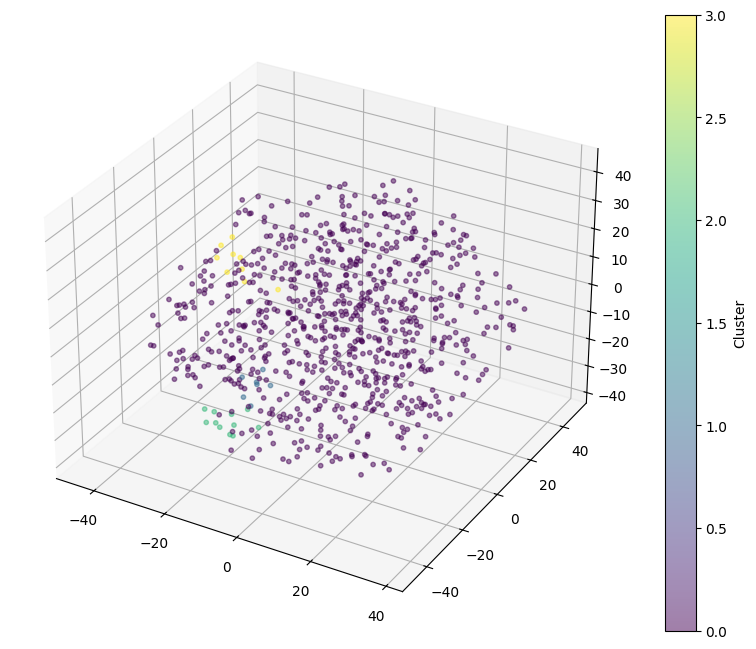

In [11]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.55, min_samples=10, metric='cosine')
clusters = dbscan.fit_predict(embeddings)
print(set(clusters))

noise = np.where(clusters == -1)[0]  # Outliers
print(f"Noise: {len(noise)}")
embeddings_no_noise = np.delete(embeddings, noise, axis=0)

tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_no_noise)
tsne = TSNE(n_components=3, random_state=42)
embeddings_3d = tsne.fit_transform(embeddings_no_noise)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c=clusters[clusters!=-1], cmap='viridis', marker='o', s=10, alpha=0.5)
fig.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

In [7]:
cluster_4_inds = np.where(clusters == 4)[0]
movie_plot_data.iloc[cluster_4_inds]

# 
# cluster_noise_inds = np.where(clusters == -1)[0]
# movie_plot_data.iloc[cluster_noise_inds].tail(10)

,Title,Plot
929,Rogue One: A Star Wars Story,All looks lost for the Rebellion against the E...
1010,Solo: A Star Wars Story,With the emerging demand of hyperfuel and othe...
1038,Star Wars: Episode I - The Phantom Menace,"The evil Trade Federation, led by Nute Gunray ..."
1039,Star Wars: Episode II - Attack of the Clones,"Ten years after the invasion of Naboo, the Gal..."
1040,Star Wars: Episode III - Revenge of the Sith,Nearly three years have passed since the begin...
1041,Star Wars: Episode IV - A New Hope,"The Imperial Forces, under orders from cruel D..."
1042,Star Wars: Episode IX - The Rise of Skywalker,While the First Order continues to ravage the ...
1043,Star Wars: Episode V - The Empire Strikes Back,"Luke Skywalker, Han Solo, Princess Leia and Ch..."
1044,Star Wars: Episode VI - Return of the Jedi,Luke Skywalker battles Jabba the Hutt and Dart...
1045,Star Wars: Episode VII - The Force Awakens,30 years after the defeat of Darth Vader and t...
